In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# Univariate Analysis

In [35]:
def histplot(col):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(x=train[col], kde=True, ax=ax)
    plt.title(f"Distribution plot for {col}")
    plt.show()


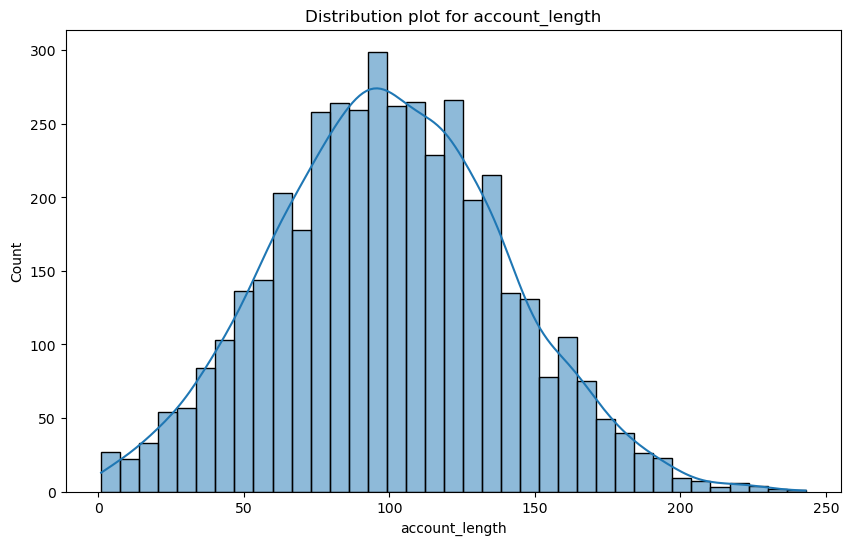

In [36]:
histplot("account_length")

This plot shows the distribution of the **account_length** feature, which represents the length of time (likely in days or months) that a customer has had their account. 

### Key Points:
- The x-axis shows the **account_length** values, ranging from 0 to about 240.
- The y-axis shows the **count**, representing the number of customers that fall into each account length range.

### Layman Explanation:
- The distribution has a bell-shaped curve, meaning most customers have an account length around 100 units (days/months).
- Fewer customers have either very short or very long account lengths (close to 0 or 240).
- This kind of distribution is often called "normal" or "bell-curve" shaped, indicating that most people fall in the middle, with fewer at the extremes.

`In simpler terms, most of the customers have had their accounts for around 100 units of time, with only a few customers having very new or very old accounts.`

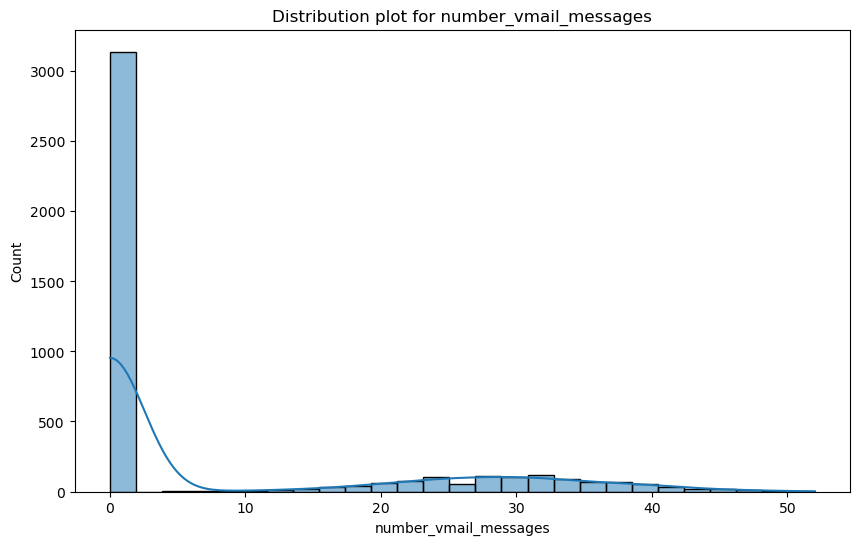

In [37]:
histplot("number_vmail_messages")

This plot shows the distribution of the **number_vmail_messages** feature, which likely refers to the number of voicemail messages each customer has received.

### Key Points:
- The x-axis represents the **number of voicemail messages** (from 0 to 50).
- The y-axis represents the **count** of customers for each number of voicemail messages.
- The majority of customers have received **0** voicemail messages, as indicated by the tall bar at 0.
- A small number of customers received between 10 and 50 voicemail messages, with the distribution being relatively flat and sparse.

### Layman Explanation:
- Most customers **do not use voicemail**, as the vast majority have received **zero voicemail messages**.
- A smaller portion of customers receive anywhere between **10 to 50 voicemail messages**, but these are much fewer in number compared to those who don't use voicemail at all. 

`This kind of distribution suggests that voicemail usage is quite low or limited to specific customers.`

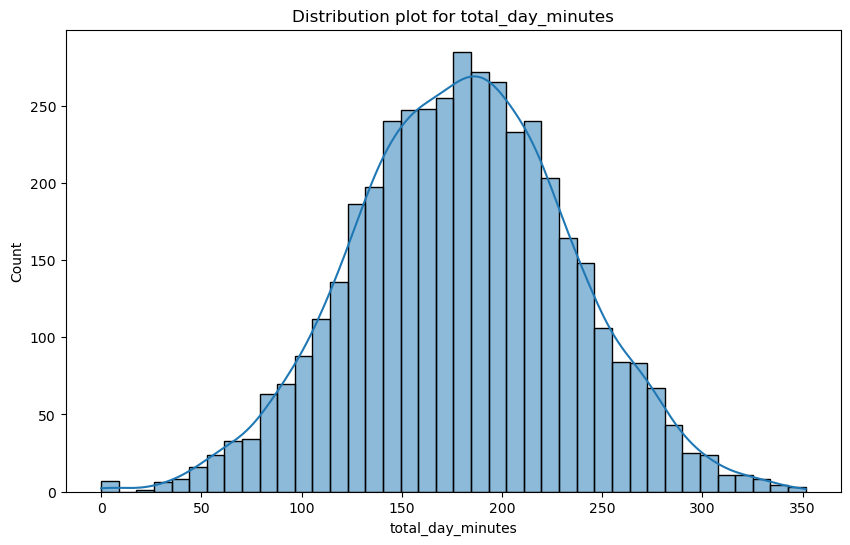

In [38]:
histplot("total_day_minutes")

This plot shows the distribution of the **total_day_minutes** feature, representing the minute of calls made by each customer per day.

### Key Points:
- The x-axis represents the **total_day_minutes** made by customers, ranging from 0 to 350.
- The y-axis shows the **count** of customers who made that number of calls.


### Layman Explanation:
- The distribution has a bell-shaped curve, meaning most customers had total minutes of call around 180.
- Fewer customers have either very short or very long account lengths (close to 0 or 350).
- This kind of distribution is often called "normal" or "bell-curve" shaped, indicating that most people fall in the middle, with fewer at the extremes.

`In simpler terms, most of the customers have had their daily minute calls around 180 minutes, with only a few customers having very new or very old accounts.`

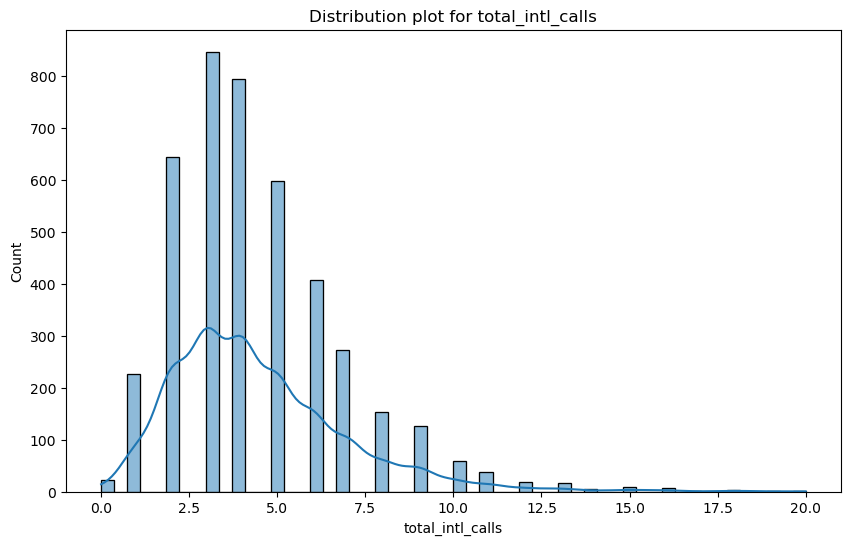

In [39]:
histplot("total_intl_calls")

This plot shows the distribution of the **total_intl_calls** feature, representing the number of international calls made by each customer.

### Key Points:
- The x-axis represents the **number of international calls** made by customers, ranging from 0 to 20.
- The y-axis shows the **count** of customers who made that number of calls.
- Most customers make between **2 to 6 international calls**, as seen from the peak around that range.
- There are fewer customers making more than **10 international calls**, and the number gradually decreases as the number of calls increases.

### Layman Explanation:
- The majority of customers make a **few international calls**, with most making **about 2 to 5** calls.
- Very few customers make **a lot of international calls**, with the number of customers dropping as the number of calls increases.
  
In simple terms, most people use international calls sparingly, with only a handful of customers making a large number of them.

In [40]:
num_col=train.select_dtypes(np.number).columns
num_col

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

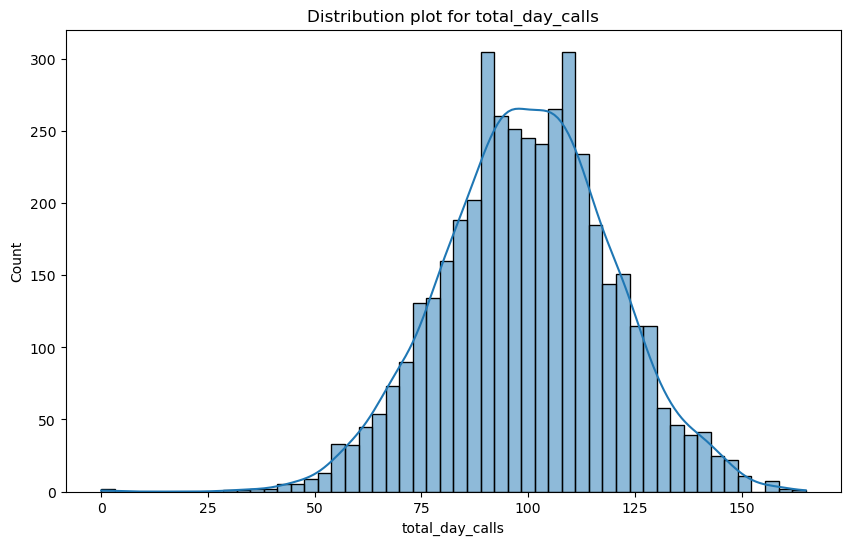

In [41]:
histplot("total_day_calls")

In [ ]:
histplot("total_eve_minutes")

In [ ]:
histplot("total_eve_charge")

In [ ]:
histplot("total_night_minutes")

In [ ]:
histplot("total_night_calls")

In [ ]:
histplot("total_night_charge")

In [ ]:
histplot("total_intl_minutes")

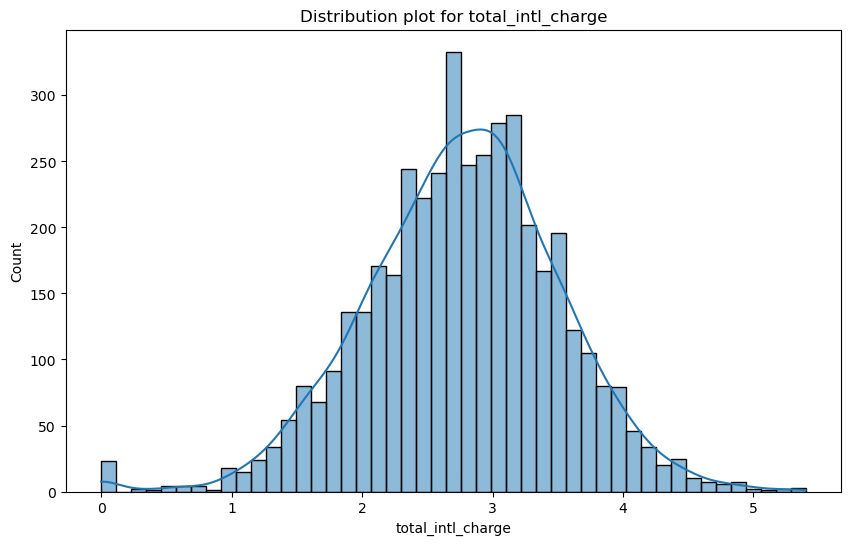

In [43]:
histplot("total_intl_charge")

In [ ]:
histplot("number_customer_service_calls")

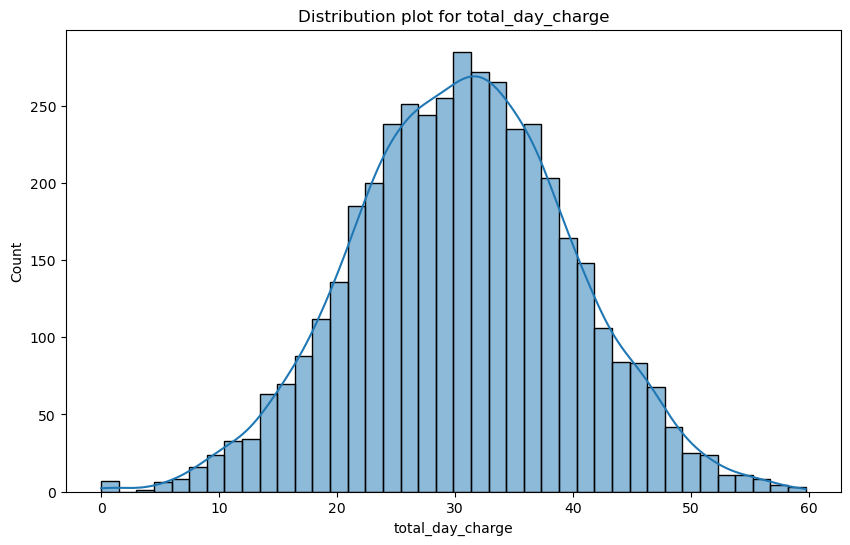

In [42]:
histplot("total_day_charge")

array([3652,  598], dtype=int64)

In [46]:
train.select_dtypes(include="object").columns


Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [77]:
def barplot(col):
    sns.set_palette("Set2")
    value= train["churn"].value_counts().values
    value_sum = sum(value)
    fig, ax= plt.subplots(figsize=(10, 6))
    sns.countplot(x=train[col])
    plt.title(f"count of {col}")
    plt.grid(axis="y")
    plt.xticks(rotation=30)
    for idx, val in enumerate(value):
        plt.annotate(round((val/value_sum)*100, 2), (idx, val))
    plt.show()

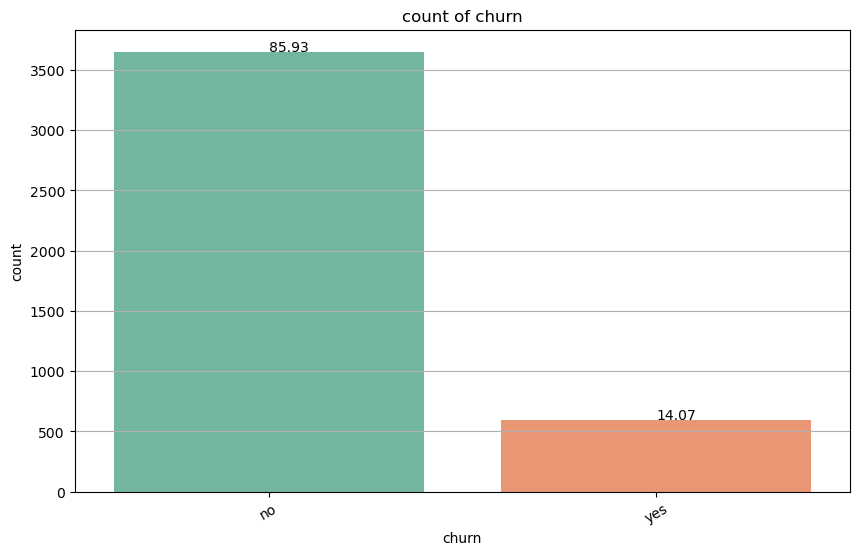

In [78]:
barplot("churn")

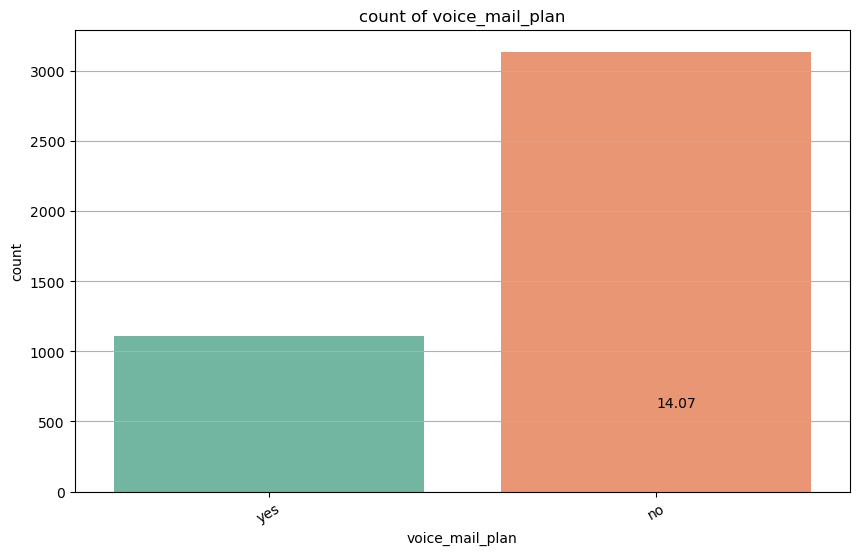

In [79]:
barplot("voice_mail_plan")

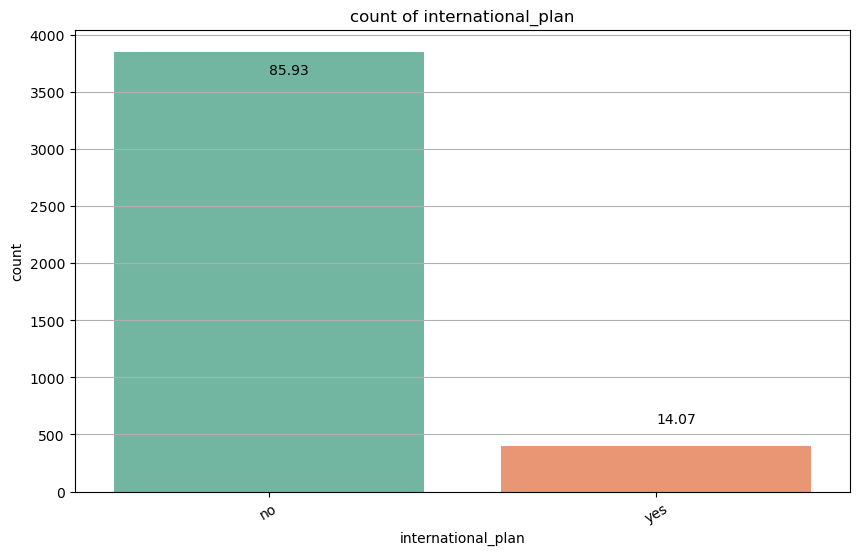

In [80]:
barplot("international_plan")

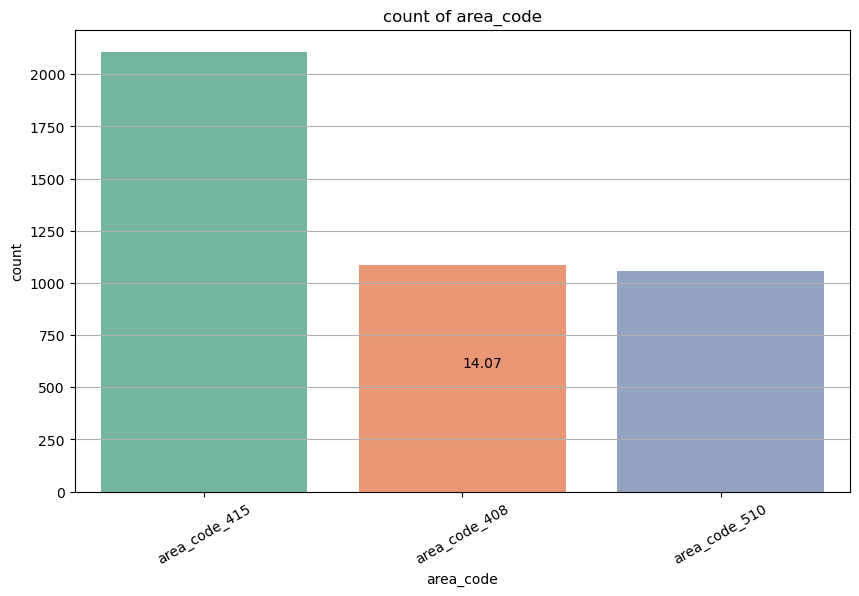

In [81]:
barplot("area_code")

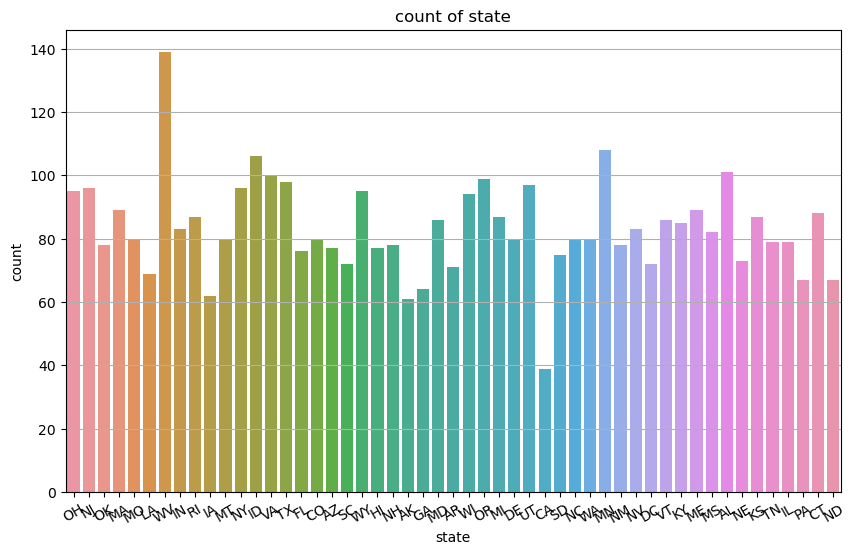

In [82]:
barplot("state")

# Bivariate Analysis 

In [83]:
def scatter_plot(col1, col2):
    train.plot(kind="scatter", x=col1, y=col2)
    plt.title("scatter plot for {} column and {} column".format(col1,col2))
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


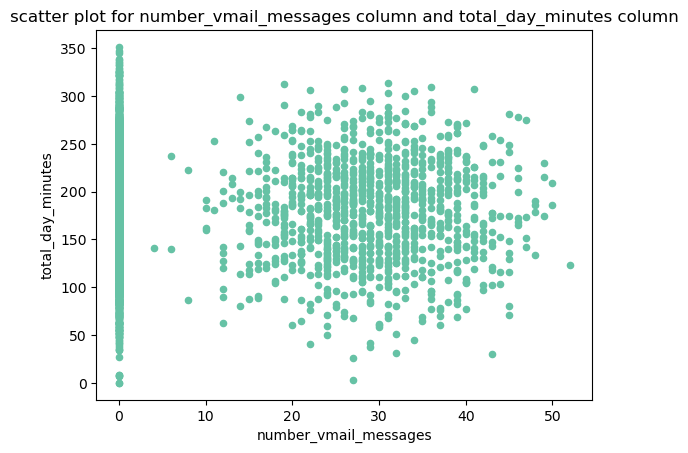

In [84]:
scatter_plot("number_vmail_messages","total_day_minutes" )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


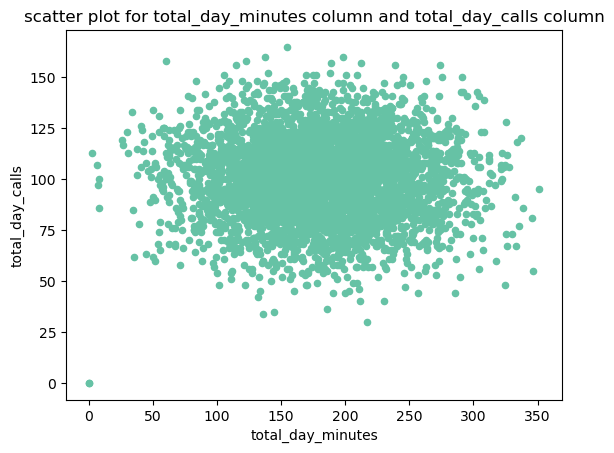

In [85]:
scatter_plot("total_day_minutes", "total_day_calls")

In [90]:
def bar_plot(col):
    fig, ax= plt.subplots(figsize=(10, 6))
    i=pd.crosstab(columns=train[col], index=train["churn"], values=train["churn"], aggfunc="count")
    i.plot(kind="bar", ax=ax)
    plt.title("count churn by {}".format(col))
    plt.grid(axis="y")
    plt.show()

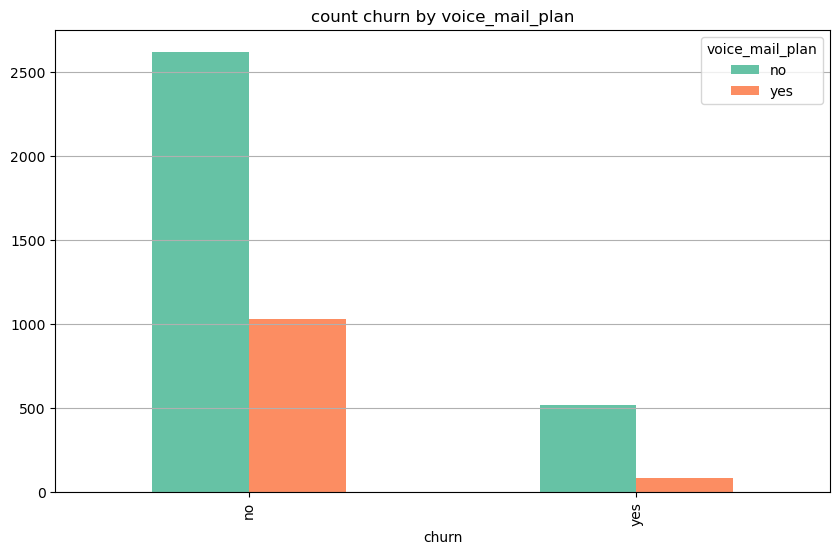

In [91]:
bar_plot("voice_mail_plan")

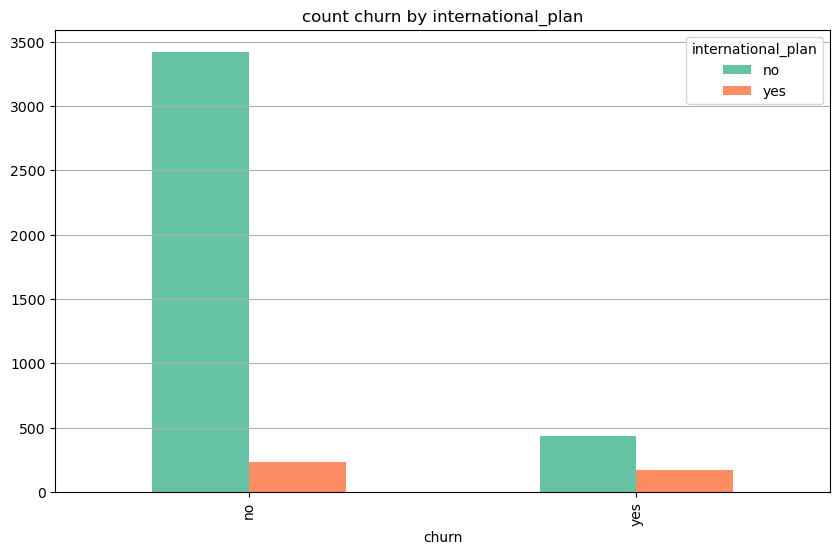

In [92]:
bar_plot("international_plan")